In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from pathlib import Path
import matplotlib.dates as mdates
import cProfile, pstats


In [16]:
# Run the simulation, optionally with enabled profiler.
#

profiler_enabled = False

if profiler_enabled == False:
    execfile("run_main.py")
else:
    cProfile.run(statement='execfile("run_main.py")', filename='mosaik_stats.prof')


2023-10-31 14:41:52.645 | INFO     | mosaik.scenario:start:255 - Starting "BuildingSim" as "BuildingSim-0" ...
2023-10-31 14:41:52.647 | INFO     | mosaik.scenario:start:255 - Starting "Collector" as "Collector-0" ...
2023-10-31 14:41:52.650 | INFO     | mosaik.scenario:start:255 - Starting "Clock" as "Clock-0" ...
2023-10-31 14:41:52.650 | INFO     | mosaik.scenario:start:255 - Starting "Weather" as "Weather-0" ...
2023-10-31 14:41:52.657 | INFO     | mosaik.scenario:start:255 - Starting "HeatPump" as "HeatPump-0" ...
2023-10-31 14:41:52.661 | INFO     | mosaik.scenario:start:255 - Starting "HystController" as "HystController-0" ...
2023-10-31 14:41:54.721 | INFO     | mosaik.scenario:run:532 - Starting simulation.
100%|██████████| 172800/172800 [03:36<00:00, 798.22steps/s] 
2023-10-31 14:45:31.291 | INFO     | mosaik.scenario:run:576 - Simulation finished successfully.


In [18]:
# Print the profiler results
#

if profiler_enabled == True:

    stats = pstats.Stats('mosaik_stats.prof')
    # stats.strip_dirs()
    stats.sort_stats('cumtime')
    stats.print_stats()


Tue Oct 31 14:45:31 2023    mosaik_stats.prof

         613841207 function calls (613840319 primitive calls) in 218.649 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      2/1    0.000    0.000  218.649  218.649 {built-in method builtins.exec}
        1    0.000    0.000  218.649  218.649 <string>:1(<module>)
        1    0.000    0.000  218.649  218.649 c:\Users\molu\AppData\Local\miniconda3\envs\EEG_1\Lib\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\_pydev_execfile.py:2(execfile)
        1    0.000    0.000  218.648  218.648 run_main.py:1(<module>)
       13    0.000    0.000  218.619   16.817 c:\Users\molu\AppData\Local\miniconda3\envs\EEG_1\Lib\site-packages\mosaik\util.py:14(sync_process)
       13    0.062    0.005  218.619   16.817 c:\Users\molu\AppData\Local\miniconda3\envs\EEG_1\Lib\site-packages\simpy\core.py:99(run)
    84192   26.348    0.000  218.557    0.003 c:\Users\molu\AppData\Local\miniconda3\e

In [3]:
path = Path('data/output/')    
dataframes = {}
for path in path.iterdir():
    if path.suffix == '.pkl':
        dataframes[path.stem] = pd.read_pickle(path)

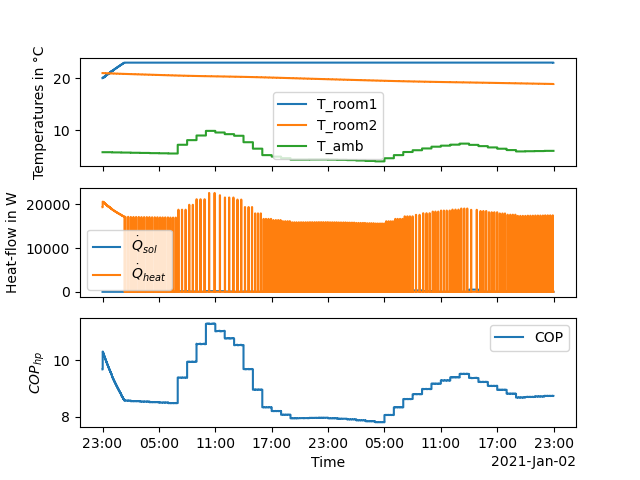

In [4]:
df = dataframes['df_BuildingSim-0_Model_0']
dtindex = dataframes['df_Clock-0_Clock'].values
fig, ax = plt.subplots(3, sharex=True)
# Roomtemperatures
ax[0].plot(dtindex, df['T_room1'], label='T_room1', drawstyle='steps-post')
ax[0].plot(dtindex, df['T_room2'], label='T_room2', drawstyle='steps-post')
ax[0].plot(dtindex, df['T_amb'], label='T_amb', drawstyle='steps-post')
ax[0].legend()
ax[0].set_ylabel('Temperatures in °C')

ax[1].plot(dtindex, df['dot_Q_sol'], label='$\dot{Q}_{sol}$', drawstyle='steps-post')
ax[1].plot(dtindex, df['dot_Q_heat'], label='$\dot{Q}_{heat}$', drawstyle='steps-post')
ax[1].legend()
ax[1].set_ylabel('Heat-flow in W')

df = dataframes['df_HeatPump-0_HeatPump_0']
ax[2].plot(dtindex, df['cop'], label='COP', drawstyle='steps-post')
ax[2].legend()
ax[2].set_ylabel('$COP_{hp}$')

ax[-1].set_xlabel('Time')
ax[-1].xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax[-1].xaxis.get_major_locator(),))